# Query.py Tutorial Doc

This tutorial shows you how to create, run, and make some basic plots from the DP1 and DP03 catalogs. 

The tutorial is split into two parts:
1. Creating and running queries
2. Plotting/summary print statements

For this tutotial, we'll be looking NEO objects. query.py contains a global dictionary that contains all searchable classes and their orbital parameters:

    "LPC": {"a_min": 50.0},
    "TNO": {"a_min": 30.1, "a_max": 50.0},
    "Ntrojan": {"a_min": 29.8, "a_max": 30.4},
    "NEO": {"q_max": 1.3, "a_max": 4.0, "e_max": 1.0},
    "MBA": {"q_min": 1.66, "a_min": 2.0, "a_max": 3.2},
    "Centaur": {"a_min": 5.5, "a_max": 30.1},
    "Jtrojan": {"a_min": 4.8, "a_max": 5.4, "e_max": 0.3},
    "JFC": {"tj_min": 2.0, "tj_max": 3.0}

The 'catalog' variable allows you to query different catalogs; the options are 'dp03_catalogs_10yr' and'dp1'.

The 'join' variable allows you to perform an inner join with either 'DiaSource' or 'SSObject'.

## 1. Creating and Running queries

First, we will show you a full example, and then provide more query examples for your reference. 

The first set of examples will use DP1. The examples at the bottom will use DP03. 

In [1]:
from lsst.rsp import get_tap_service
import sys
import os
sys.path.append(os.path.abspath('../../sso_query/'))
import query as q
import plots as p
import pandas as pd

After generating your desired query, it's time to run it. All examples can be run by uncommeting the 'q.run_query' line of code. 

The run_query function can return either an AstroPy table (to_pandas = False) or a Pandas dataframe (to_pandas = True). 

The function automatically prints the first few rows of your data. 

### Full example: DP03, combined NEO and LPC, joined with DiaSource

In [3]:
# create the query
NEO_string, NEO_class_name = q.make_query(catalog = "dp03_catalogs_10yr", class_name = "NEO", cutoffs = None, join = "DiaSource", limit = 1000)
print(NEO_string)
LPC_string, LPC_class_name = q.make_query(catalog = "dp03_catalogs_10yr", class_name = "LPC", cutoffs = None, join = "DiaSource", limit = 1000)
print(LPC_string)

# run the query
NEO_data_table = q.run_query(NEO_string, NEO_class_name, "dp03_catalogs_10yr", to_pandas = True)
LPC_data_table = q.run_query(LPC_string, LPC_class_name, "dp03_catalogs_10yr", to_pandas = True)

main_example_table = p.combine_tables(NEO_data_table, LPC_data_table)

Querying dp03_catalogs_10yr.DiaSource for: ['dias.magTrueVband', 'dias.band']
SELECT mpc.incl, mpc.q, mpc.e, mpc.ssObjectID, mpc.mpcDesignation, dias.magTrueVband, dias.band FROM dp03_catalogs_10yr.MPCORB AS mpc
    INNER JOIN dp03_catalogs_10yr.DiaSource AS dias ON mpc.ssObjectId = dias.ssObjectId
    WHERE mpc.q < 1.3 AND mpc.e < 1.0 AND mpc.q/(1-mpc.e) < 4.0
    LIMIT 1000;
Querying dp03_catalogs_10yr.DiaSource for: ['dias.magTrueVband', 'dias.band']
SELECT mpc.incl, mpc.q, mpc.e, mpc.ssObjectID, mpc.mpcDesignation, dias.magTrueVband, dias.band FROM dp03_catalogs_10yr.MPCORB AS mpc
    INNER JOIN dp03_catalogs_10yr.DiaSource AS dias ON mpc.ssObjectId = dias.ssObjectId
    WHERE mpc.q/(1-mpc.e) > 50.0
    LIMIT 1000;
Job phase is COMPLETED


,band,e,incl,magTrueVband,mpcDesignation,q,ssObjectID,a,class_name
0,g,0.578894,12.913040,22.756304,2017 QS1,0.538033,2695878480830736785,1.277667,NEO
1,z,0.578894,12.913040,21.545273,2017 QS1,0.538033,2695878480830736785,1.277667,NEO
2,i,0.578894,12.913040,23.745947,2017 QS1,0.538033,2695878480830736785,1.277667,NEO
3,i,0.578894,12.913040,22.863636,2017 QS1,0.538033,2695878480830736785,1.277667,NEO
4,r,0.578894,12.913040,21.588366,2017 QS1,0.538033,2695878480830736785,1.277667,NEO
...,...,...,...,...,...,...,...,...,...
995,r,0.195812,8.699685,21.839777,S00003Gk,1.193888,2697971343410766079,1.484588,NEO
996,z,0.195812,8.699685,21.735128,S00003Gk,1.193888,2697971343410766079,1.484588,NEO
997,r,0.195812,8.699685,20.862299,S00003Gk,1.193888,2697971343410766079,1.484588,NEO
998,r,0.195812,8.699685,23.412964,S00003Gk,1.193888,2697971343410766079,1.484588,NEO


Job phase is COMPLETED


,band,e,incl,magTrueVband,mpcDesignation,q,ssObjectID,a,class_name
0,i,0.408508,11.636482,20.998835,SS0002fc,32.988281,2699191234936191175,55.771308,LPC
1,r,0.408508,11.636482,20.985666,SS0002fc,32.988281,2699191234936191175,55.771308,LPC
2,g,0.408508,11.636482,21.033901,SS0002fc,32.988281,2699191234936191175,55.771308,LPC
3,r,0.408508,11.636482,20.965687,SS0002fc,32.988281,2699191234936191175,55.771308,LPC
4,z,0.408508,11.636482,20.926714,SS0002fc,32.988281,2699191234936191175,55.771308,LPC
...,...,...,...,...,...,...,...,...,...
995,z,0.540304,10.897244,22.341356,SS0002dk,33.416209,2727096070827027972,72.692023,LPC
996,i,0.540304,10.897244,22.371719,SS0002dk,33.416209,2727096070827027972,72.692023,LPC
997,r,0.540304,10.897244,22.494055,SS0002dk,33.416209,2727096070827027972,72.692023,LPC
998,z,0.540304,10.897244,22.535128,SS0002dk,33.416209,2727096070827027972,72.692023,LPC


### DP1 Examples
Because SSObject is a one-to-one match to the MPCORB catalog and DiaSource has multiple observations per object, note that the SSObject query will run much faster than the DiaSource query. 

When joining with DiaSource and SSObject, note the columns. Both tables have different columns in the DP03 and DP1 catalogs, be careful of this when plotting!

##### Ex 1: Class name provided, join with SSObject

In [6]:
string, class_name = q.make_query(catalog = "dp1", class_name = "NEO", cutoffs = None, join = "SSObject")
print(string)
# NEO_data_table = q.run_query(string, class_name, "dp1", to_pandas = True)

Querying dp1.SSObject for: ['sso.discoverySubmissionDate', 'sso.numObs']
SELECT mpc.incl, mpc.q, mpc.e, mpc.ssObjectID, mpc.mpcDesignation, sso.discoverySubmissionDate, sso.numObs FROM dp1.MPCORB AS mpc
    INNER JOIN dp1.SSObject AS sso ON mpc.ssObjectId = sso.ssObjectId
    WHERE mpc.q < 1.3 AND mpc.e < 1.0 AND mpc.q/(1-mpc.e) < 4.0;


##### Ex 2: Class name provided, join with DiaSource

In [4]:
string, class_name = q.make_query(catalog = "dp1", class_name = None, cutoffs = {"q_max": 1.3, "a_max": 4.0, "e_max": 1.0}, join = "DiaSource")
print(string)
# NEO_data_table = q.run_query(string, class_name, "dp1", to_pandas = True)

Querying dp1.DiaSource for: ['dias.apFlux', 'dias.apFlux_flag', 'dias.apFluxErr', 'dias.band']
SELECT mpc.incl, mpc.q, mpc.e, mpc.ssObjectID, mpc.mpcDesignation, dias.apFlux, dias.apFlux_flag, dias.apFluxErr, dias.band FROM dp1.MPCORB AS mpc
    INNER JOIN dp1.DiaSource AS dias ON mpc.ssObjectId = dias.ssObjectId
    WHERE mpc.q < 1.3 AND mpc.e < 1.0 AND mpc.q/(1-mpc.e) < 4.0;


### DP03 Examples

##### Ex 1: DP03, Class name provided, no join. 

In [3]:
string, class_name = q.make_query("dp03_catalogs_10yr", class_name = "NEO", cutoffs = None, join = None)
print(string)
# NEO_data_table = q.run_query(string, class_name, "dp03_catalogs_10yr", to_pandas = True)

SELECT mpc.incl, mpc.q, mpc.e, mpc.ssObjectID, mpc.mpcDesignation FROM dp03_catalogs_10yr.MPCORB AS mpc
    WHERE mpc.q < 1.3 AND mpc.e < 1.0 AND mpc.q/(1-mpc.e) < 4.0;


##### Ex 2: DP03, Class name provided, join table with DiaSource

In [4]:
string, class_name = q.make_query("dp03_catalogs_10yr", class_name = "NEO", cutoffs = None, join = "DiaSource")
print(string)
# NEO_data_table = q.run_query(string, class_name, "dp03_catalogs_10yr", to_pandas = True)

Querying dp03_catalogs_10yr.DiaSource for: ['dias.magTrueVband', 'dias.band']
SELECT mpc.incl, mpc.q, mpc.e, mpc.ssObjectID, mpc.mpcDesignation, dias.magTrueVband, dias.band FROM dp03_catalogs_10yr.MPCORB AS mpc
    INNER JOIN dp03_catalogs_10yr.DiaSource AS dias ON mpc.ssObjectId = dias.ssObjectId
    WHERE mpc.q < 1.3 AND mpc.e < 1.0 AND mpc.q/(1-mpc.e) < 4.0;


##### Ex 3: DP03, Cutoffs provided, no join

In [5]:
NEO_cutoffs = {"q_max": 1.3, "a_max": 4.0, "e_max": 1.0}

string, class_name = q.make_query("dp03_catalogs_10yr", class_name = None, cutoffs = NEO_cutoffs, join = None)
print(string)
print(class_name)
# NEO_data_table = q.run_query(string, class_name, "dp03_catalogs_10yr", to_pandas = True)

SELECT mpc.incl, mpc.q, mpc.e, mpc.ssObjectID, mpc.mpcDesignation FROM dp03_catalogs_10yr.MPCORB AS mpc
    WHERE mpc.q < 1.3 AND mpc.e < 1.0 AND mpc.q/(1-mpc.e) < 4.0;
NEO


##### Ex 4: DP03, Cutoffs provided, join with SSObject

In [5]:
string, class_name = q.make_query("dp03_catalogs_10yr", class_name = None, cutoffs = NEO_cutoffs, join = "SSObject")
print(string)
print(class_name)
# NEO_data_table = q.run_query(string, class_name, "dp03_catalogs_10yr", to_pandas = True)

Querying dp03_catalogs_10yr.SSObject for: ['sso.g_H', 'sso.r_H', 'sso.i_H', 'sso.discoverySubmissionDate', 'sso.numObs']
SELECT mpc.incl, mpc.q, mpc.e, mpc.ssObjectID, mpc.mpcDesignation, sso.g_H, sso.r_H, sso.i_H, sso.discoverySubmissionDate, sso.numObs, (sso.g_H - sso.r_H) AS g_r_color, (sso.r_H - sso.i_H) AS r_i_color FROM dp03_catalogs_10yr.MPCORB AS mpc
    INNER JOIN dp03_catalogs_10yr.SSObject AS sso ON mpc.ssObjectId = sso.ssObjectId
    WHERE mpc.q < 1.3 AND mpc.e < 1.0 AND mpc.q/(1-mpc.e) < 4.0;
NEO


## 2. Plotting + Summary Print Statements

The query_helpers.py module holds functions that create some useful summary plots and print statements. For our examples, we'll be looking at NEOs in the DP1 catalog. 

##### a vs. e, a vs. i

Index(['band', 'e', 'incl', 'magTrueVband', 'mpcDesignation', 'q',
       'ssObjectID', 'a', 'class_name'],
      dtype='object')


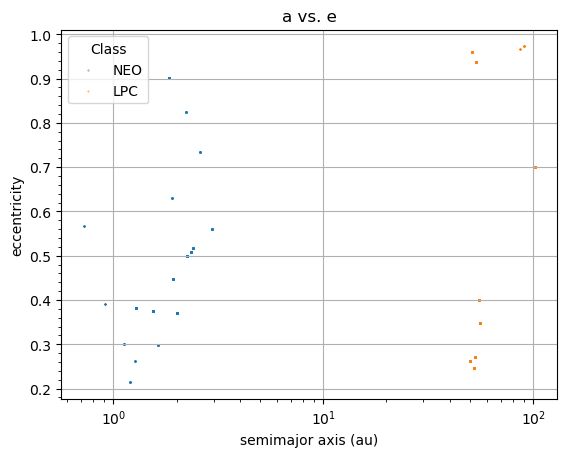

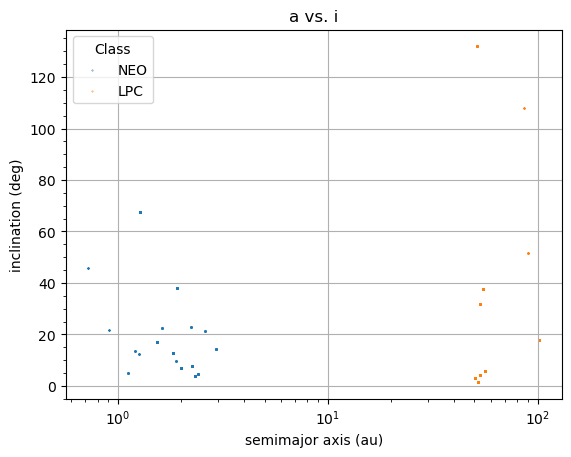

In [8]:
print(main_example_table.columns)

# qh.plot_data(main_example_table, log = True)

p.run_basic_plots(main_example_table, 1500, log_scale = False)

### Joined with DiaSource

In [2]:
# Entire DP1 catalog

# create the query
NEO_string, NEO_class_name = q.make_query(catalog = "dp1", class_name = "NEO", cutoffs = None, join = "DiaSource")
print(NEO_string)
LPC_string, LPC_class_name = q.make_query(catalog = "dp1", class_name = "LPC", cutoffs = None, join = "DiaSource")
print(LPC_string)
TNO_string, TNO_class_name = q.make_query(catalog = "dp1", class_name = "TNO", cutoffs = None, join = "DiaSource")
Ntrojan_string, Ntrojan_class_name = q.make_query(catalog = "dp1", class_name = "Ntrojan", cutoffs = None, join = "DiaSource")
MBA_string, MBA_class_name = q.make_query(catalog = "dp1", class_name = "MBA", cutoffs = None, join = "DiaSource")
Centaur_string, Centaur_class_name = q.make_query(catalog = "dp1", class_name = "Centaur", cutoffs = None, join = "DiaSource")
Jtrojan_string, Jtrojan_class_name = q.make_query(catalog = "dp1", class_name = "Jtrojan", cutoffs = None, join = "DiaSource")
JFC_string, JFC_class_name = q.make_query(catalog = "dp1", class_name = "JFC", cutoffs = None, join = "DiaSource")


# run the query
NEO = q.run_query(NEO_string, NEO_class_name, "dp1", to_pandas = True)
LPC = q.run_query(LPC_string, LPC_class_name, "dp1", to_pandas = True)
TNO = q.run_query(TNO_string, TNO_class_name, "dp1", to_pandas = True)
Ntrojan = q.run_query(Ntrojan_string, Ntrojan_class_name, "dp1", to_pandas = True)
MBA = q.run_query(MBA_string, MBA_class_name, "dp1", to_pandas = True)
Centaur = q.run_query(Centaur_string, Centaur_class_name, "dp1", to_pandas = True)
Jtrojan = q.run_query(Jtrojan_string, Jtrojan_class_name, "dp1", to_pandas = True)
JFC = q.run_query(JFC_string, JFC_class_name, "dp1", to_pandas = True)


main_example_table = p.combine_tables(NEO, LPC, TNO, Ntrojan, MBA, Centaur, Jtrojan, JFC)

Querying dp1.DiaSource for: ['dias.apFlux', 'dias.apFlux_flag', 'dias.apFluxErr', 'dias.band']
SELECT mpc.incl, mpc.q, mpc.e, mpc.ssObjectID, mpc.mpcDesignation, dias.apFlux, dias.apFlux_flag, dias.apFluxErr, dias.band FROM dp1.MPCORB AS mpc
    INNER JOIN dp1.DiaSource AS dias ON mpc.ssObjectId = dias.ssObjectId
    WHERE mpc.q < 1.3 AND mpc.e < 1.0 AND mpc.q/(1-mpc.e) < 4.0;
Querying dp1.DiaSource for: ['dias.apFlux', 'dias.apFlux_flag', 'dias.apFluxErr', 'dias.band']
SELECT mpc.incl, mpc.q, mpc.e, mpc.ssObjectID, mpc.mpcDesignation, dias.apFlux, dias.apFlux_flag, dias.apFluxErr, dias.band FROM dp1.MPCORB AS mpc
    INNER JOIN dp1.DiaSource AS dias ON mpc.ssObjectId = dias.ssObjectId
    WHERE mpc.q/(1-mpc.e) > 50.0;
Querying dp1.DiaSource for: ['dias.apFlux', 'dias.apFlux_flag', 'dias.apFluxErr', 'dias.band']
Querying dp1.DiaSource for: ['dias.apFlux', 'dias.apFlux_flag', 'dias.apFluxErr', 'dias.band']
Querying dp1.DiaSource for: ['dias.apFlux', 'dias.apFlux_flag', 'dias.apFluxErr',

,apFlux,apFluxErr,apFlux_flag,band,e,incl,mpcDesignation,q,ssObjectID,a,class_name
0,6255.779785,686.778015,False,i,0.383285,38.956723,2009 VA26,0.933121,21163646070699585,1.513052,NEO
1,137561.000000,464.989014,False,g,0.173054,18.283831,2023 UN9,0.808130,21165819307243854,0.977247,NEO
2,143463.000000,498.498993,False,g,0.173054,18.283831,2023 UN9,0.808130,21165819307243854,0.977247,NEO
3,240864.000000,609.564026,False,r,0.173054,18.283831,2023 UN9,0.808130,21165819307243854,0.977247,NEO
4,217844.000000,670.518005,False,r,0.173054,18.283831,2023 UN9,0.808130,21165819307243854,0.977247,NEO
5,278750.000000,923.974976,False,i,0.173054,18.283831,2023 UN9,0.808130,21165819307243854,0.977247,NEO
6,272183.000000,862.742981,False,i,0.173054,18.283831,2023 UN9,0.808130,21165819307243854,0.977247,NEO
7,3186.149902,357.355011,False,r,0.544695,33.705677,2002 FB6,0.818067,21163615737361986,1.796745,NEO
8,2229.699951,261.351013,False,g,0.544695,33.705677,2002 FB6,0.818067,21163615737361986,1.796745,NEO
9,1997.040039,262.979004,False,g,0.544695,33.705677,2002 FB6,0.818067,21163615737361986,1.796745,NEO


Job phase is COMPLETED
ValueError: Results table is empty or None. Check input cutoffs.
Job phase is COMPLETED
ValueError: Results table is empty or None. Check input cutoffs.
Job phase is COMPLETED
ValueError: Results table is empty or None. Check input cutoffs.
Job phase is COMPLETED


,apFlux,apFluxErr,apFlux_flag,band,e,incl,mpcDesignation,q,ssObjectID,a,class_name
0,-874.994019,1495.380005,False,z,0.069491,9.455032,2006 FM26,2.820176,21163632917362253,3.030787,MBA
1,147.177994,1548.069946,False,z,0.069491,9.455032,2006 FM26,2.820176,21163632917362253,3.030787,MBA
2,90370.601562,534.776001,False,r,0.178761,4.836133,2001 SQ248,1.812507,21163611662530641,2.207039,MBA
3,104010.000000,755.590027,False,i,0.178761,4.836133,2001 SQ248,1.812507,21163611662530641,2.207039,MBA
4,8817.129883,696.880005,False,i,0.120666,27.660986,2024 WG104,2.706866,23133931615302199,3.078312,MBA
...,...,...,...,...,...,...,...,...,...,...,...
5212,5225.669922,632.763977,False,r,0.218123,34.106703,2019 PH12,2.042289,21164745481597512,2.612035,MBA
5213,5725.890137,597.002014,False,r,0.218123,34.106703,2019 PH12,2.042289,21164745481597512,2.612035,MBA
5214,5112.870117,599.403015,False,r,0.218123,34.106703,2019 PH12,2.042289,21164745481597512,2.612035,MBA
5215,7563.379883,722.434998,False,u,0.227998,29.375519,2011 SR134,2.013617,21164711173436498,2.608306,MBA


Job phase is COMPLETED
ValueError: Results table is empty or None. Check input cutoffs.
Job phase is COMPLETED


,apFlux,apFluxErr,apFlux_flag,band,e,incl,mpcDesignation,q,ssObjectID,a,class_name
0,634.669983,1545.760010,False,z,0.099885,7.709743,2005 XK5,4.731688,21163628924253515,5.256759,Jtrojan
1,3713.550049,1528.229980,False,z,0.099885,7.709743,2005 XK5,4.731688,21163628924253515,5.256759,Jtrojan
2,18111.599609,569.603027,False,r,0.099885,7.709743,2005 XK5,4.731688,21163628924253515,5.256759,Jtrojan
3,11150.099609,517.268005,False,g,0.099885,7.709743,2005 XK5,4.731688,21163628924253515,5.256759,Jtrojan
4,-1352.910034,1533.650024,False,z,0.099885,7.709743,2005 XK5,4.731688,21163628924253515,5.256759,Jtrojan
5,19119.099609,572.033997,False,r,0.099885,7.709743,2005 XK5,4.731688,21163628924253515,5.256759,Jtrojan
6,11526.700195,515.210022,False,g,0.099885,7.709743,2005 XK5,4.731688,21163628924253515,5.256759,Jtrojan


Job phase is COMPLETED


,apFlux,apFluxErr,apFlux_flag,band,e,incl,mpcDesignation,q,ssObjectID,a,class_name
0,2.387130,1578.000000,False,z,0.132361,6.231887,2005 CB44,2.688598,21163628572193858,3.098754,JFC
1,329.510010,1581.719971,False,z,0.132361,6.231887,2005 CB44,2.688598,21163628572193858,3.098754,JFC
2,5625.209961,394.316010,False,g,0.102718,10.418573,2015 BJ544,2.822970,21164728071173194,3.146134,JFC
3,8817.129883,696.880005,False,i,0.120666,27.660986,2024 WG104,2.706866,23133931615302199,3.078312,JFC
4,8743.540039,685.450989,False,i,0.120666,27.660986,2024 WG104,2.706866,23133931615302199,3.078312,JFC
...,...,...,...,...,...,...,...,...,...,...,...
1625,6517.609863,617.164978,False,i,0.197105,34.916978,2015 MV118,2.086360,21164728252512342,2.598547,JFC
1626,7259.279785,621.627014,False,i,0.197105,34.916978,2015 MV118,2.086360,21164728252512342,2.598547,JFC
1627,6647.750000,620.327026,False,i,0.197105,34.916978,2015 MV118,2.086360,21164728252512342,2.598547,JFC
1628,5544.370117,418.200989,False,r,0.197105,34.916978,2015 MV118,2.086360,21164728252512342,2.598547,JFC


##### Observations per type?

In [7]:
obs_per_type_counts = p.obs_type_counts(main_example_table)

class_name
MBA        5217
JFC        1630
NEO          23
Jtrojan       7
Name: count, dtype: int64


##### Observations per unique object?

In [8]:
obs_per_unique_object_counts = p.obs_unique_obj_counts(main_example_table)

            ssObjectID class_name  obs_count
0    20890932542191434        MBA          3
1    20890945661711695        MBA          8
2    20890950007009348        JFC          6
3    20890950007009348        MBA          6
4    20890950007009349        MBA         19
..                 ...        ...        ...
503  23133931615303984        MBA         13
504  23133931615303985        MBA          8
505  23133931615303986        JFC         10
506  23700330477793593        JFC         18
507  23700330477793593        MBA         18

[508 rows x 3 columns]


##### How many of each type in DP1?

In [9]:
obj_count_per_class_type = p.type_counts(main_example_table)

  class_name  object_count
0        JFC           113
1    Jtrojan             1
2        MBA           391
3        NEO             3


##### Observations per object, by filter:

In [10]:
observations_by_object_filter = p.obs_filter(main_example_table)

# of observations by Object: ssObjectID
21163637482928473    160
21164728252512342    132
23133931615301687     64
23133931615301943     60
23133931615301942     60
                    ... 
21164728102106433      1
21163611409953348      1
21163641456899922      1
21164719762453330      1
21165810483998787      1
Name: count, Length: 409, dtype: int64
# of observations by Filter: band
i    2489
g    2201
r    1739
z     422
u      26
Name: count, dtype: int64
# of unique observations for each unique object, by filter:              ssObjectID band  obs_filter_count
0     20890932542191434    r                 1
1     20890932542191434    z                 2
2     20890945661711695    g                 2
3     20890945661711695    r                 2
4     20890945661711695    z                 4
...                 ...  ...               ...
1119  23133931615303986    g                 6
1120  23133931615303986    r                 4
1121  23700330477793593    g                 8
1122  

##### Magnitude Range plot:

/opt/lsst/software/stack/conda/envs/lsst-scipipe-10.0.0/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Standard Deviation of Range: 1.3352724313735962
Mean Range: 1.7116103
Large range criterion: 3.0468826


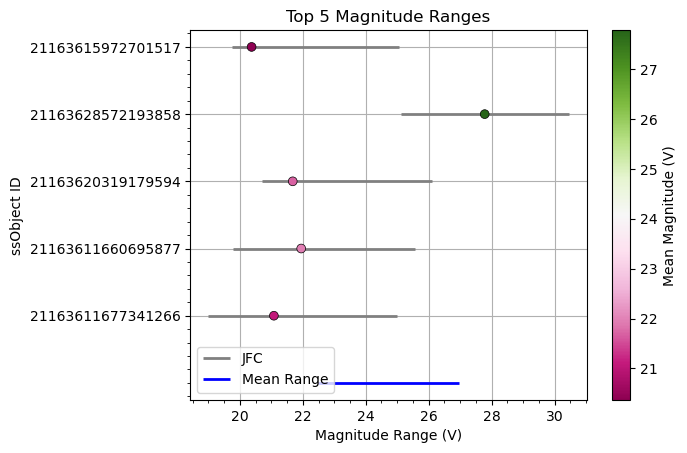

Standard Deviation of Range: 0.4106866717338562
Mean Range: 0.5713711
Large range criterion: 0.98205775
Large range criterion removed all or too many objects — skipping filter.


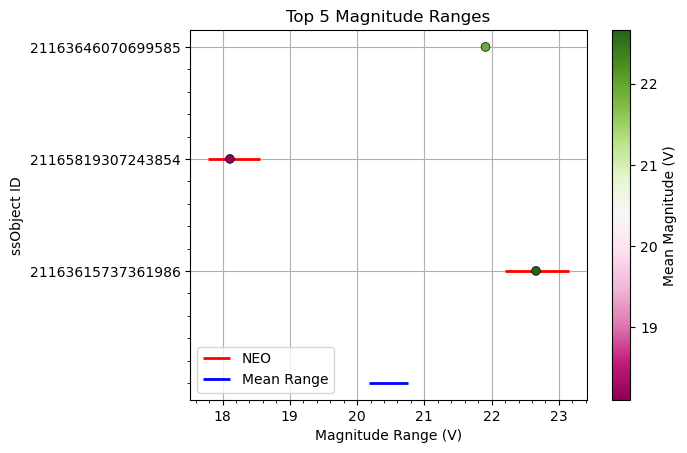

In [6]:
# need to add magnitude columns
JFC_mags = q.calc_magnitude(JFC['apFlux'])
JFC['magTrueVband'] = JFC_mags
JFC_ex_with_mags = p.data_grouped_mags(JFC)
p.mag_range_plot(JFC_ex_with_mags, head_number = 5)

NEO_mags = q.calc_magnitude(NEO['apFlux'])
NEO['magTrueVband'] = NEO_mags
NEO_ex_with_mags = p.data_grouped_mags(NEO)
p.mag_range_plot(NEO_ex_with_mags, head_number = 5)

### Joined with SSObject
